**Business Introduction**

**Client Company:** A British eCommerce retailing business requires the best ways of enhancing market strategies, increasing sales estimates, and the study of customer behaviour.

**Dataset:** Features of the company transactions include ‘invoice no’, ‘stock code’, ‘description’, ‘quantity’, ‘invoice date’, ‘unit price’, ‘customer ID’, and ‘country’. The link to the dataset - https://shorturl.at/tiiBz

**The Task:** I have been appointed as a Data Scientist to investigate the dataset, analyse it, and come up with key observations and data-driven conclusions on what should be done. It is all aimed at assisting in the sales strategies, as well as understanding customers’ behaviour and offering better product recommendations.

**Note:** For the visualization part I will mostly be using Barplot (I find it most suited for the task) along with Histplot, Lineplot, Heatmap, Scatterplot, Pie Chart, etc.

**Data Exploration**

This section incorporates the initial basic exploration to recognize characteristics and the overall quality of the data.

In [ ]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from collections import Counter

# Loading the dataset | Dataset - https://www.kaggle.com/datasets/carrie1/ecommerce-data
df = pd.read_csv('ecommerce_data.csv', encoding='ISO-8859-1')

# Information about the dataset consisting of columns, non-null counts, and data types
df.info()

# Checking for the missing values
missing_values = df.isnull().sum()
display(missing_values)

# Statistical summary of the numerical features within the dataset
display(df.describe())

# Checking for the first 10 rows
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


**Discussion on Data Quality**

i. Null values/missing values are present. This is mostly the case with the Customer ID column.

ii. There might be outliers or negative quantities, especially in returns.

iii. Lastly, we will actively look for redundant columns that are not beneficial for our business questions.

**Data Preprocessing**

This section comprises cleaning the data and then subsequently preparing it for our further analysis.

In [ ]:
# Dropping rows with missing CustomerID (since it’s essential for our analysis)
df_clean = df.dropna(subset=['CustomerID'])

# Removing rows with negative quantity (assuming these are returns)
df_clean = df_clean[df_clean['Quantity'] > 0]

# Adding a 'TotalPrice' column
df_clean = df_clean.assign(TotalPrice=df_clean['Quantity'] * df_clean['UnitPrice'])

# Converting InvoiceDate to datetime format
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate']) # Ensuring that the InvoiceDate column is of datetime type

# Extracting Month, Day, and Hour required for the analysis
df_clean['Month'] = df_clean['InvoiceDate'].dt.month
df_clean['Day'] = df_clean['InvoiceDate'].dt.dayofweek
df_clean['Hour'] = df_clean['InvoiceDate'].dt.hour

# Removing duplicates
df_clean = df_clean.drop_duplicates()

# Checking the final cleaned data
df_clean.info()
df_clean.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 392732 entries, 0 to 541908
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392732 non-null  object        
 1   StockCode    392732 non-null  object        
 2   Description  392732 non-null  object        
 3   Quantity     392732 non-null  int64         
 4   InvoiceDate  392732 non-null  datetime64[ns]
 5   UnitPrice    392732 non-null  float64       
 6   CustomerID   392732 non-null  float64       
 7   Country      392732 non-null  object        
 8   TotalPrice   392732 non-null  float64       
 9   Month        392732 non-null  int32         
 10  Day          392732 non-null  int32         
 11  Hour         392732 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(3), int64(1), object(4)
memory usage: 34.5+ MB


,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0
TotalPrice,0
Month,0


**Exploratory Data Visualization Section**

**i. Distribution of Unit Price**

This plot helps identify outliers and the general distribution of product prices.

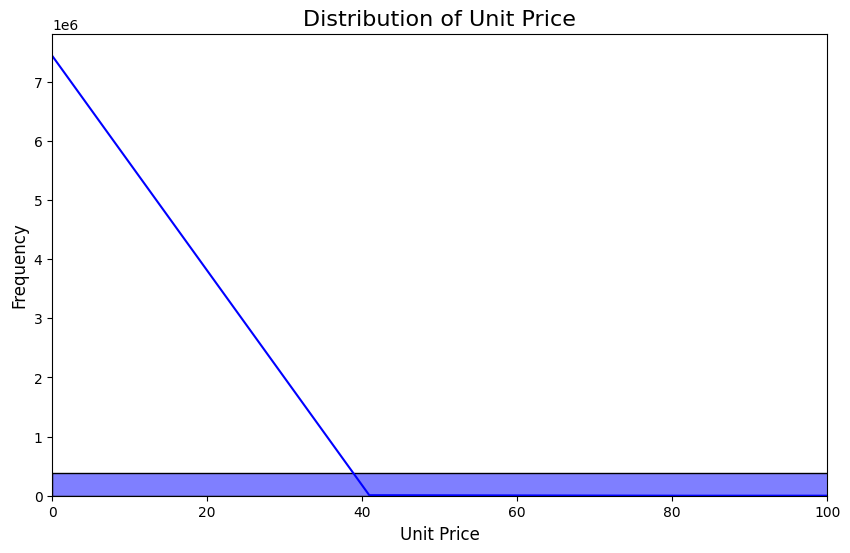

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['UnitPrice'], bins=50, kde=True, color='blue')
plt.title('Distribution of Unit Price', fontsize=16)
plt.xlabel('Unit Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xlim([0, 100])  # Focussing on products under $100 to handle outliers
plt.show()

**Explanation:** As shown above, the distribution of the unit prices can be displayed using a histogram employing a kernel density estimate (KDE) curve. From the graph, we can observe that most of the products are under $100, and some items that are high-priced may need further investigation.

**ii. Distribution of Quantity Purchased**

This visualization part detects any patterns in the number of units bought per transaction and spots any unusual purchasing behaviour.

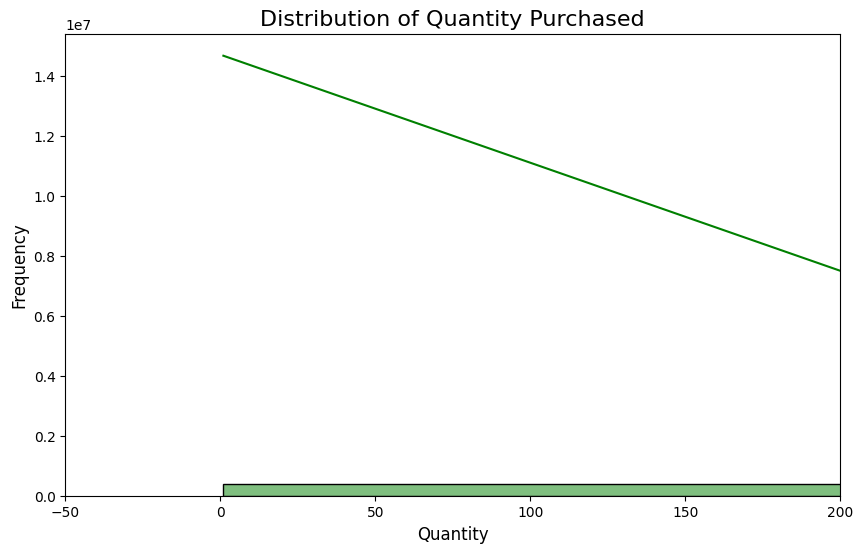

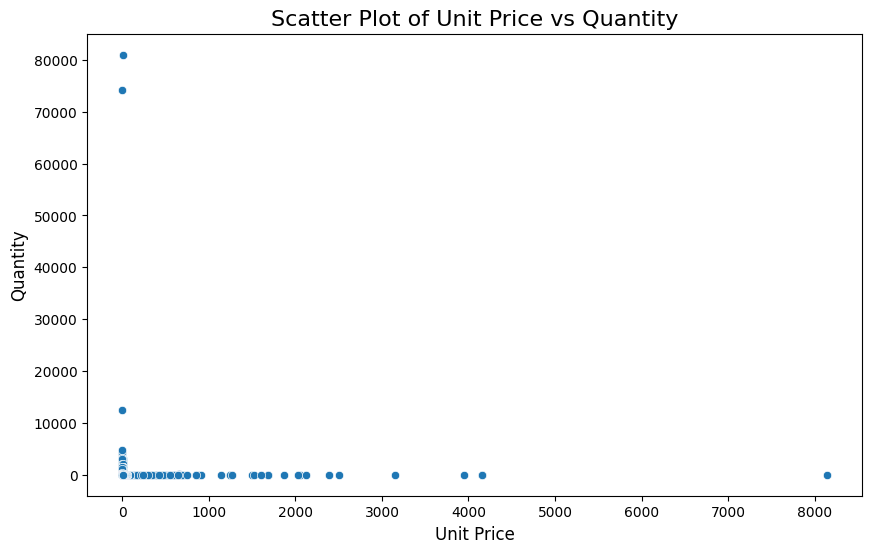

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['Quantity'], bins=50, kde=True, color='green')
plt.title('Distribution of Quantity Purchased', fontsize=16)
plt.xlabel('Quantity', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xlim([-50, 200])  # Focussing on reasonable quantities, ignoring large outliers
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='UnitPrice', y='Quantity', data=df_clean)
plt.title('Scatter Plot of Unit Price vs Quantity', fontsize=16)
plt.xlabel('Unit Price', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.show()

**Explanation:** The distribution shows how frequently different quantities are purchased. Negative values represent returns, which the business should investigate further.

**iii. Heatmap of Correlations Between Numeric Features:** A heatmap is a great approach to measure the correlations between several numeric variables such as unit price, total price, and quantity.

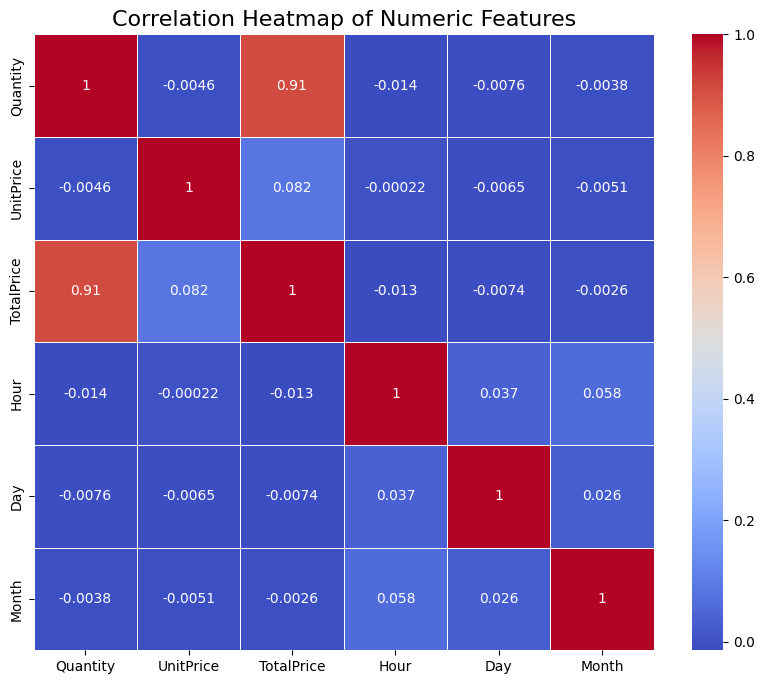

In [ ]:
# Selecting numerical features for correlation analysis
numerical_features = ['Quantity', 'UnitPrice', 'TotalPrice', 'Hour', 'Day', 'Month']

# Calculating the correlation matrix
corr_matrix = df_clean[numerical_features].corr()

# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features', fontsize=16)
plt.show()

**Explanation:** This correlation heatmap efficiently draws out the relationships between key numeric features (total price, quantity, and unit price). Hence, understanding these critical correlations significantly helps in selecting features for our further analysis.

**iv. Top 10 Countries by Number of Transactions**

This bar plot highlights the top 10 active countries related to the number of transactions, thereby helping us to focus on the most significant lucrative markets.

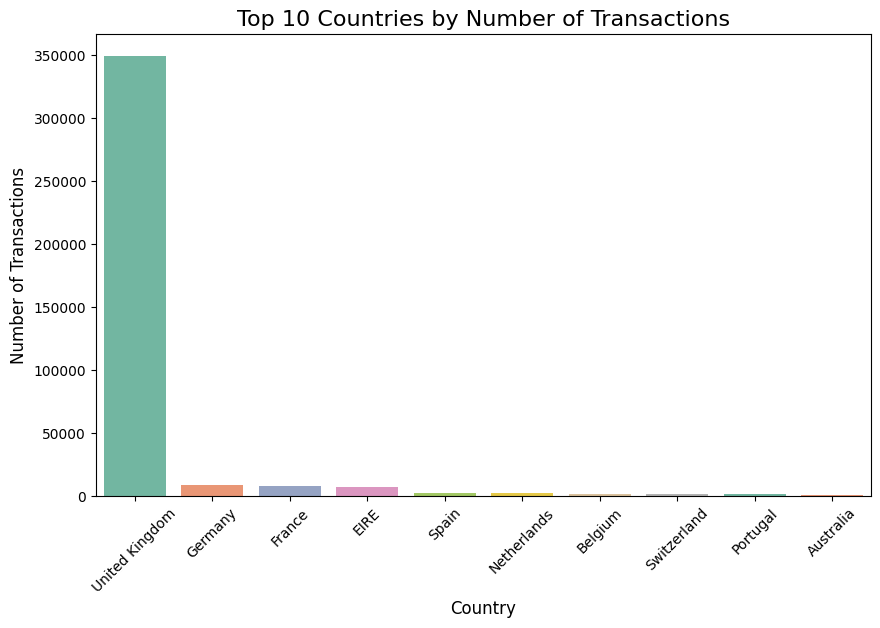

In [ ]:
top_countries = df_clean['Country'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='Set2', hue=top_countries.index, legend=False)
plt.title('Top 10 Countries by Number of Transactions', fontsize=16)
plt.ylabel('Number of Transactions', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.xticks(rotation=45)
plt.show()

**Explanation:** This bar plot shows the top 10 countries with the most transactions. The UK dominates the market, followed by other European countries, giving a clear focus for market analysis.

**v. Total Revenue by Hour of the Day**

This plot is mainly focused on indicating how revenues are spread across different hours of the day and thereby aid the business in determining the right hours.

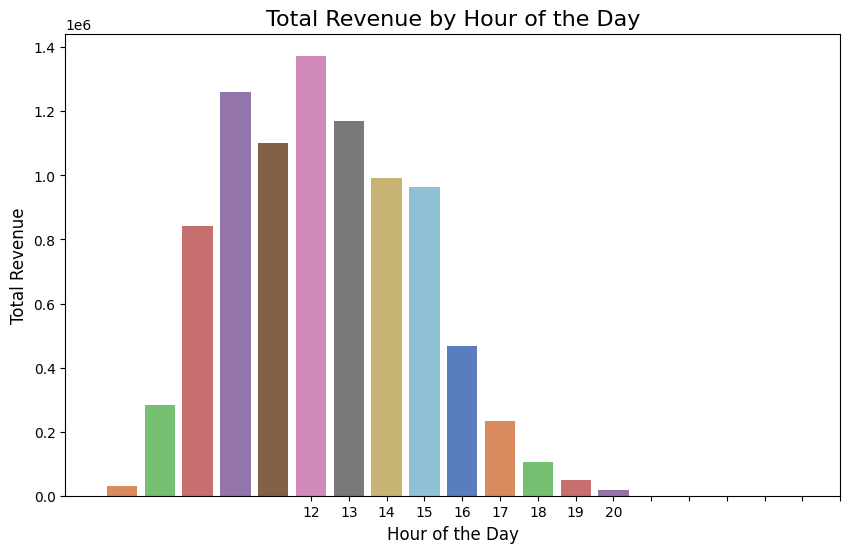

In [ ]:
revenue_by_hour = df_clean.groupby('Hour')['TotalPrice'].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=revenue_by_hour.index, y=revenue_by_hour.values, palette='muted', hue=revenue_by_hour.index, legend=False)
plt.title('Total Revenue by Hour of the Day', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(revenue_by_hour.index)
plt.show()

**Explanation:** This bar chart shows how total revenue varies by the hour of the day. It also crucially provides the business with some valuable data insights to better understand when customers are most active, opening up more avenues for marketing and operational decisions.

**vi. Total Revenue by Month**

This visualization can be utilized to identify the fluctuating amounts of cash inflows that occurred throughout the year which the business can use to approximate its sales during certain seasons.

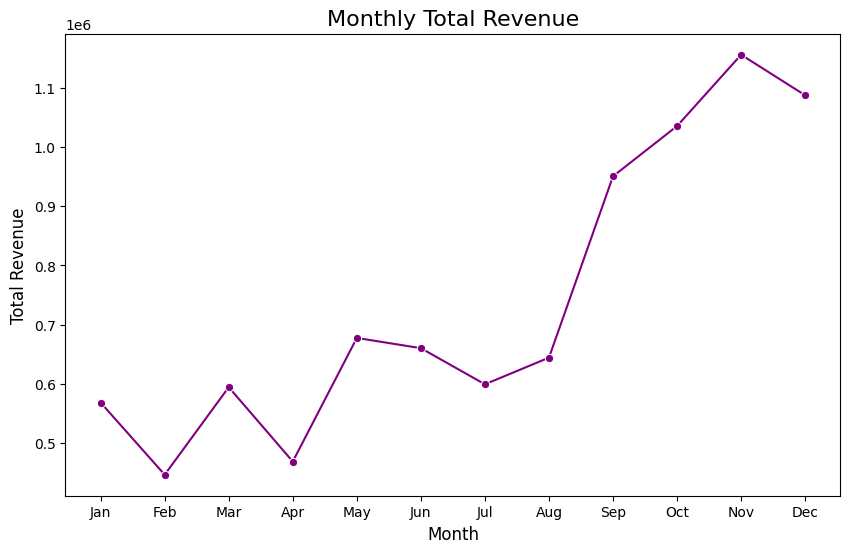

In [ ]:
# Calculating total revenue by month
monthly_revenue = df_clean.groupby('Month')['TotalPrice'].sum()

# Plotting monthly total revenue
plt.figure(figsize=(10, 6))
ax = sns.lineplot(x=monthly_revenue.index, y=monthly_revenue.values, marker='o', color='purple')
plt.title('Monthly Total Revenue', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
ax.set_xticks(range(1, 13))
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

**Explanation:** This line plot tracks total revenue over the months. It detects revenue fluctuations throughout the year and filters out months with higher or lower sales, catalysing inventory and marketing strategies.

**Explanatory Data Analysis: Business Questions**

**Question 1:** What are the top 5 countries by revenue (excluding the UK, since it's the company’s base market)?

**Importance:** Knowledge of the most profitable channels and markets can assist the company in organizing targeted marketing communications along with internationalization plans.

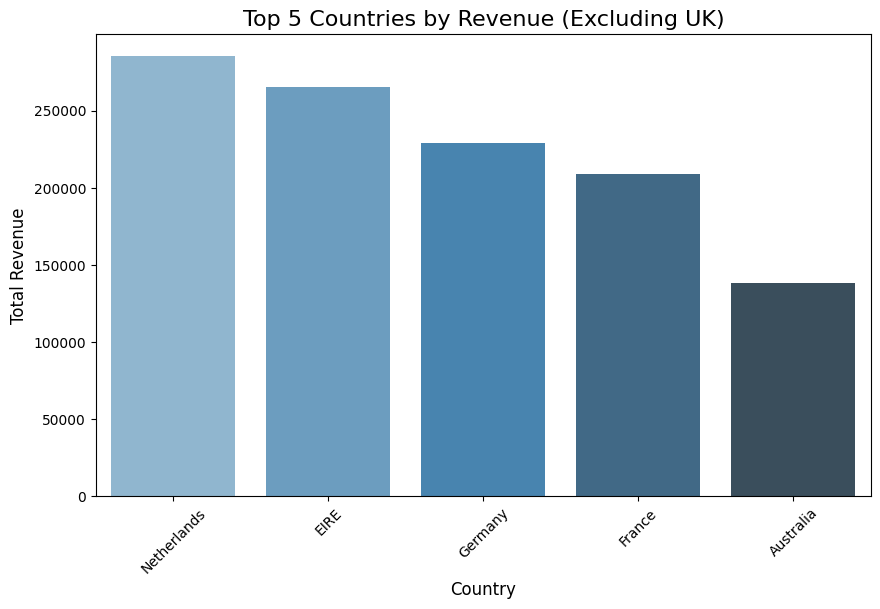

In [ ]:
# Calculating revenue by country
revenue_by_country = df_clean[df_clean['Country'] != 'United Kingdom'].groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(5)

# Plotting top 5 countries by revenue excluding the UK
plt.figure(figsize=(10,6))
sns.barplot(x=revenue_by_country.index, y=revenue_by_country.values, palette='Blues_d', hue=revenue_by_country.index, legend=False)
plt.title('Top 5 Countries by Revenue (Excluding UK)', fontsize=16)
plt.ylabel('Total Revenue', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.xticks(rotation=45)
plt.show()

**Result Explanation:** This identifies the top markets outside the UK providing the company with suitable opportunities to explore localized marketing and inventory strategies.

**Question 2:** What are the most frequent product pairings (i.e., products frequently bought together)?

**Importance:** Getting to know the most purchased item combinations is really valuable for cross-selling and bundled products (marketing strategies).

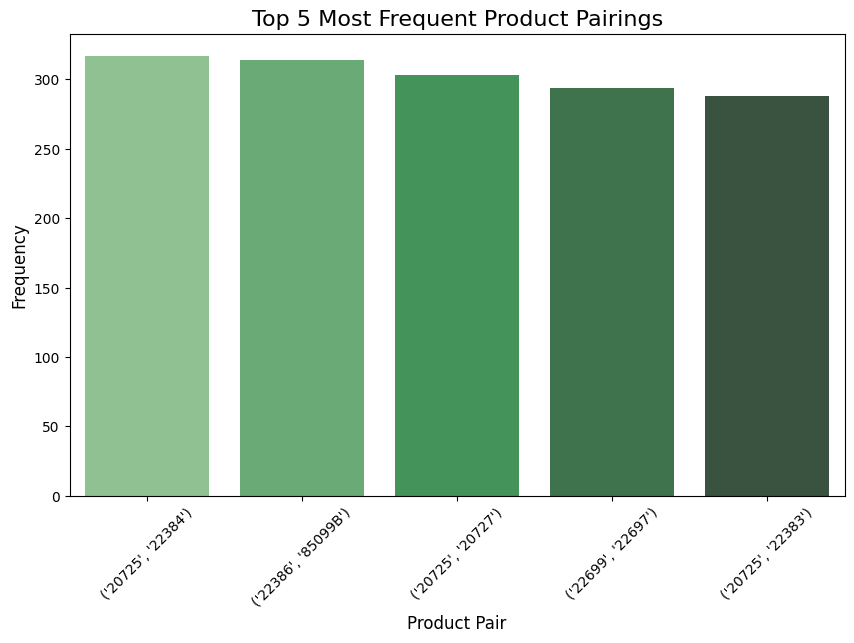

In [ ]:
# Creating a basket of products by invoice
basket = df_clean.groupby('InvoiceNo')['StockCode'].apply(list)

# Counting product combinations
combos = Counter()

# Iterating over each basket of products
for products in basket:
    # For products in basket:
    combos.update(Counter(combinations(products, 2)))

# Converting the counter to a DataFrame
pairing_df = pd.DataFrame(combos.most_common(5), columns=['Product_Pair', 'Frequency'])

# Plotting the most frequent product pairings
plt.figure(figsize=(10,6))
sns.barplot(x=pairing_df['Product_Pair'].astype(str), y=pairing_df['Frequency'], palette='Greens_d',hue=pairing_df['Product_Pair'].astype(str), legend=False) # Set hue to the x variable and legend to False
plt.title('Top 5 Most Frequent Product Pairings', fontsize=16)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Product Pair', fontsize=12)
plt.xticks(rotation=45)
plt.show()

**Result Explanation:** The company can make use of data analytics to bundle these products together, impressively boosting cross-selling efforts.

**Question 3: What time of day generates the most sales?**

**Importance:** Determining the most appropriate time when buyers are the most active could aid the business by advertising at the right time and engaging with the buyers.

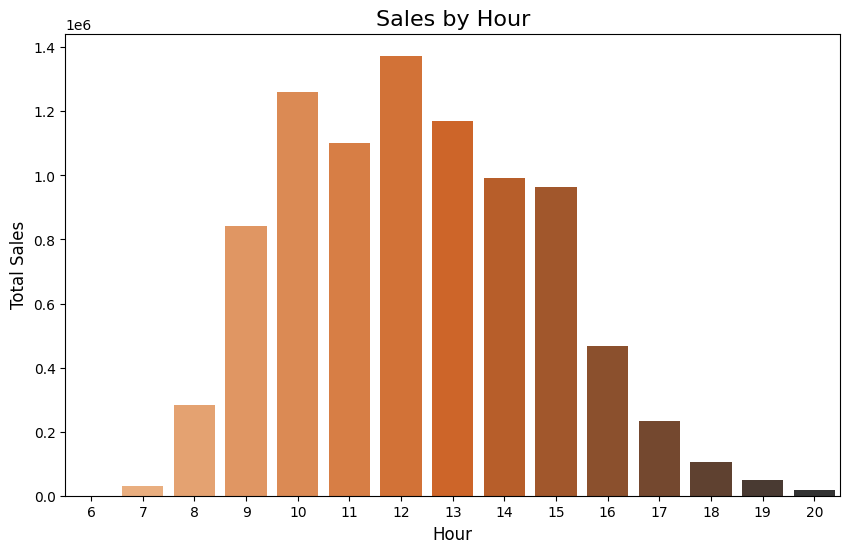

In [ ]:
# Calculating total sales for each hour
sales_by_hour = df_clean.groupby('Hour')['TotalPrice'].sum()

# Plotting sales by hour
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_hour.index, y=sales_by_hour.values, palette='Oranges_d', hue=sales_by_hour.index, legend=False) # Set hue to the x variable and legend to False
plt.title('Sales by Hour', fontsize=16)
plt.xlabel('Hour', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.show()

**Result Explanation:** The result obtained from the visualization stresses the need for the optimization of targeted promotions and customer engagement during peak shopping hours.

**Question 4:** Who are the top 5 high-value customers (based on total revenue)?

**Importance:** Detecting valuable customers allows the company to propagate personalized loyalty programs and exclusive offers.

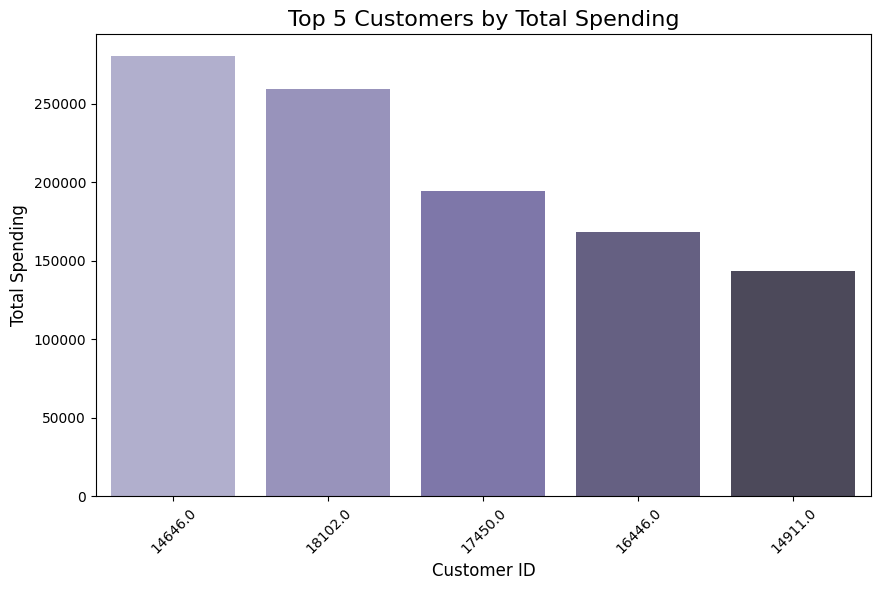

In [ ]:
# Calculating total spending per customer
customer_spending = df_clean.groupby('CustomerID')['TotalPrice'].sum()

# Getting the top 5 customers
top_customers = customer_spending.sort_values(ascending=False).head(5)

# Plotting top 5 customers
plt.figure(figsize=(10, 6))
sns.barplot(x=top_customers.index.astype(str), y=top_customers.values, palette='Purples_d', hue=top_customers.index.astype(str), legend=False) # Set hue to the x variable and legend to False
plt.title('Top 5 Customers by Total Spending', fontsize=16)
plt.xlabel('Customer ID', fontsize=12)
plt.ylabel('Total Spending', fontsize=12)
plt.xticks(rotation=45)
plt.show()

**Result Explanation:** The company can certainly build and design VIP programs/special discounts for these high-value customers.

**Question 5:** What is the return rate for products, and which products are most often returned?

**Importance:** Arguably, one of the best ways of addressing low customer satisfaction levels and high operation costs is by minimizing returns. This section deals with navigating the return rate for products.

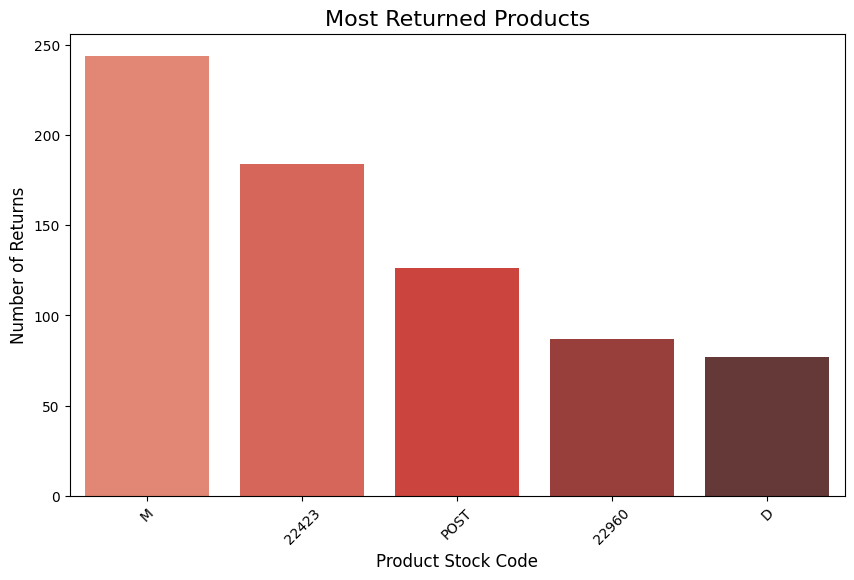

In [ ]:
# Identifying returns (negative quantities)
returns = df[df['Quantity'] < 0]

# Grouping by product and calculating return rates
return_rate = returns.groupby('StockCode')['Quantity'].count().sort_values(ascending=False).head(5)

# Plotting most returned products
plt.figure(figsize=(10,6))
sns.barplot(x=return_rate.index.astype(str), y=return_rate.values, palette='Reds_d', hue=return_rate.index.astype(str), legend=False)
plt.title('Most Returned Products', fontsize=16)
plt.ylabel('Number of Returns', fontsize=12)
plt.xlabel('Product Stock Code', fontsize=12)
plt.xticks(rotation=45)
plt.show()

**Result Explanation:** To conclude, having a rich understanding of return patterns helps to address product quality issues or even improve product descriptions.

**Question 6:** How does the average order value (AOV) vary by country?

**Importance:** The average order value by country is useful for the business to customize its relevant marketing and pricing strategies for different markets. It can also essentially deliver insights related to customer purchasing behaviour in different regions.

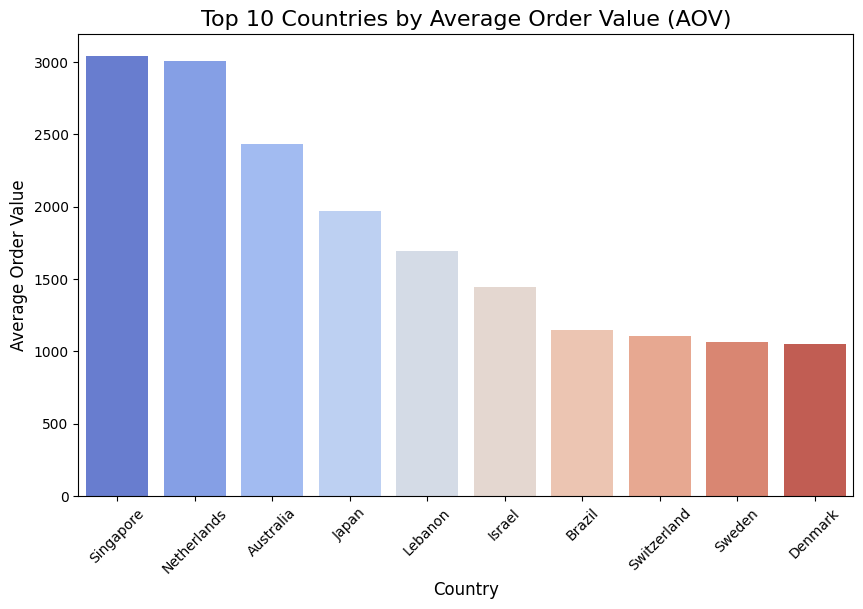

In [ ]:
# Calculating average order value (AOV) by country
aov_by_country = df_clean.groupby('Country').agg({'TotalPrice': 'sum', 'InvoiceNo': 'nunique'})
aov_by_country['AOV'] = aov_by_country['TotalPrice'] / aov_by_country['InvoiceNo']
aov_by_country_sorted = aov_by_country['AOV'].sort_values(ascending=False).head(10)

# Plotting the top 10 countries by AOV
plt.figure(figsize=(10,6))
sns.barplot(x=aov_by_country_sorted.index, y=aov_by_country_sorted.values, palette='coolwarm', hue=aov_by_country_sorted.index, legend=False)
plt.title('Top 10 Countries by Average Order Value (AOV)', fontsize=16)
plt.ylabel('Average Order Value', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.xticks(rotation=45)
plt.show()

**Result Explanation:** This complete analysis identifies the countries with the topmost average order values and the data helps the business to reform their pricing strategies and expedites the need to focus on high-value markets.

**Question 7:** What percentage of sales come from repeat customers vs. new customers?

**Importance:** Evaluating repeat versus new customer metrics can provide the company with a proper understanding of customer loyalty and the effectiveness of retention strategies. It also reveals the importance of customer acquisition.

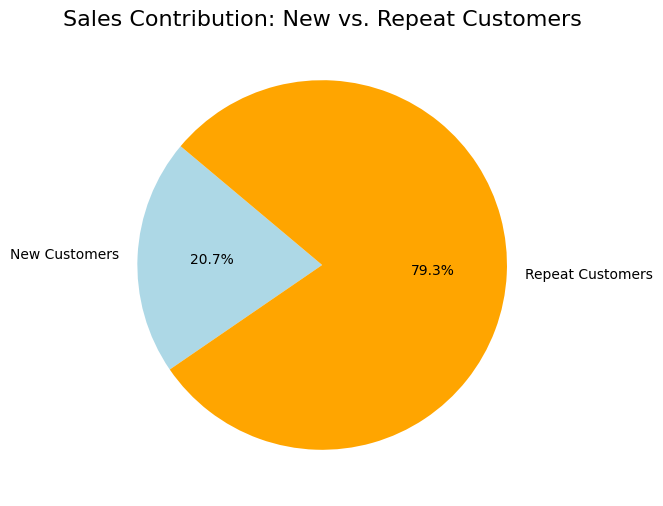

In [ ]:
# Identifying first-time purchases
df_clean['FirstPurchase'] = df_clean.groupby('CustomerID')['InvoiceDate'].transform('min') == df_clean['InvoiceDate']

# Calculating total sales for new vs. repeat customers
sales_new_customers = df_clean[df_clean['FirstPurchase'] == True]['TotalPrice'].sum()
sales_repeat_customers = df_clean[df_clean['FirstPurchase'] == False]['TotalPrice'].sum()

# Calculating the percentages
total_sales = sales_new_customers + sales_repeat_customers
percent_new_customers = (sales_new_customers / total_sales) * 100
percent_repeat_customers = (sales_repeat_customers / total_sales) * 100

# Pie chart to show the distribution
plt.figure(figsize=(8,6))
plt.pie([percent_new_customers, percent_repeat_customers], labels=['New Customers', 'Repeat Customers'], autopct='%1.1f%%', colors=['lightblue', 'orange'], startangle=140)
plt.title('Sales Contribution: New vs. Repeat Customers', fontsize=16)
plt.show()

**Result Explanation:** This pie chart shows the new customer sales compared to the repeat customer sales, hence, revealing the customer loyalty, and retention efforts paradigms.

**Question 8:** How does the distribution of revenue vary across different price ranges?

**Importance:** This section deals with the distribution of revenues across various price ranges assisting the company to assess its product pricing and thoroughly evaluate the performance of high, medium, and low-priced products.

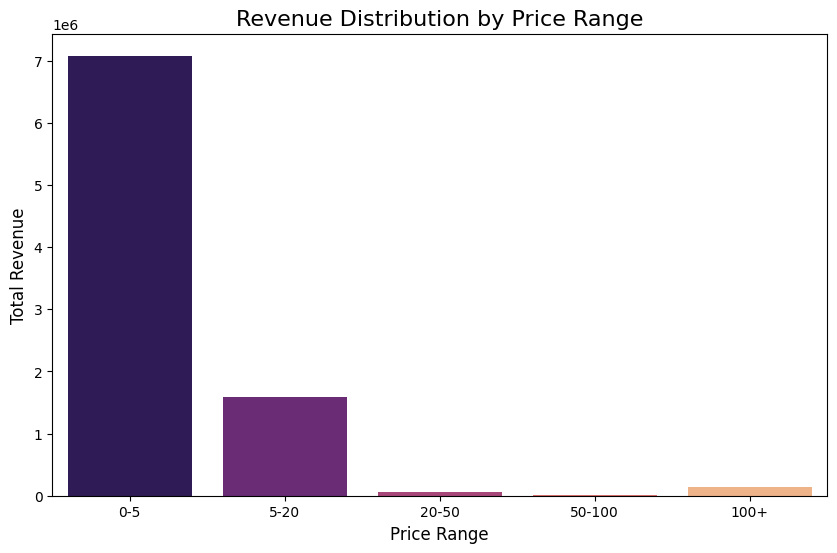

In [ ]:
# Creating price bins
df_clean['PriceRange'] = pd.cut(df_clean['UnitPrice'], bins=[0, 5, 20, 50, 100, df_clean['UnitPrice'].max()], labels=['0-5', '5-20', '20-50', '50-100', '100+'])

# Grouping by price range and calculating total revenue
revenue_by_price_range = df_clean.groupby('PriceRange', observed=False)['TotalPrice'].sum()

# Plotting the revenue by price range
plt.figure(figsize=(10,6))
sns.barplot(x=revenue_by_price_range.index, y=revenue_by_price_range.values, palette='magma', hue=revenue_by_price_range.index, legend=False)
plt.title('Revenue Distribution by Price Range', fontsize=16)
plt.ylabel('Total Revenue', fontsize=12)
plt.xlabel('Price Range', fontsize=12)
plt.show()

**Result Explanation:** This bar chart showcases the company’s revenue distribution across several price ranges of the products, letting the business estimate the performance of different product departments.

**Question 9:** How the number of transactions vary especially in the chosen time interval - weekly?

**Importance:** Analysing the trend in the quantity of transactions propagates the firm to understand how the volume of sales alters over time. It can even signal growth trends, promotion effects, and seasonal behaviours.

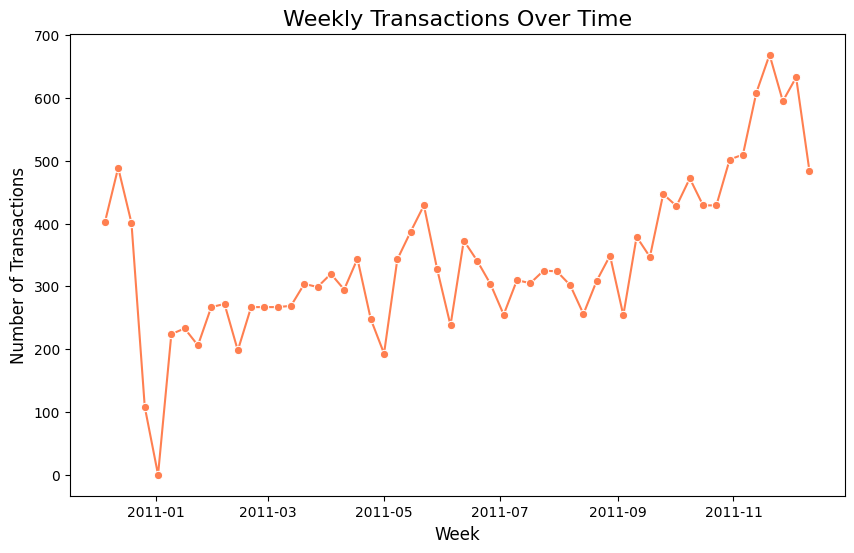

In [ ]:
# Resampling by week to count transactions (invoices) over time
df_clean.set_index('InvoiceDate', inplace=True)
transactions_over_time = df_clean.resample('W')['InvoiceNo'].nunique()

# Plotting the trend in transactions over time
plt.figure(figsize=(10,6))
sns.lineplot(x=transactions_over_time.index, y=transactions_over_time.values, marker='o', color='coral')
plt.title('Weekly Transactions Over Time', fontsize=16)
plt.ylabel('Number of Transactions', fontsize=12)
plt.xlabel('Week', fontsize=12)
plt.show()

**Result Explanation:** This line plot shows the transaction progression of the trend, keying in on the fluctuations in sales volume. All these insights are eventually tied to marketing campaigns, seasonality, or other business factors.

**Final Discussion**

From this explanatory data analysis, the following business insights have been established which can help in effective future planning for the business. When choosing the data to include in the analysis, we focused on covering several crucial aspects such as customers’ behaviour, performance of goods and services, and sales trends. Specifically, I provided answers to eight challenging business questions by using the proficient features of Python and its relevant libraries and supported our results with visualizations.

**Key Insights**

**i. Top Revenue-Generating Countries:** Except for the United Kingdom, the business enjoys huge sales from other countries such as Germany, the Netherlands, and Ireland. This factually gives an existence of high demand for products/services from the international market. Hence, a need to focus on those specific regions for efficient growth and targeted marketing.

**ii. Product Pairing Trends:** The product pairs that customers often buy can show potential cross-sell schemes. Thus, based on knowledge of which products are often purchased together, the business can offer combined packages or suggest other products to enlarge the basket size and checkout items.

**iii. Sales Patterns by Month, Week, and Hour:** It is quite reasonable to observe the seasonal pattern with respect to the monthly and weekly revenues, for example, some months yield much higher revenues. Likewise, the peak sales hours tell us about the best time for marketing, restocking, and ‘flash sales’ promotions. The analysis also depicts that there are always periods that can be regarded as the busiest periods and others that could be characterized by low activity, thus calling for intellectual promotions to be carried out during the latter.

**iv. High-Value Customers:** To increase revenue, it is logical to offer additional services to the top five customers, which generate the biggest share of the total revenues, in order to develop relevant loyalty programs.

**v. Product Returns:** Some of these findings relate to return rates where there are products that are returned more often than others. Such information is valuable for solving problems connected to product quality, improving descriptions, or changing prices.

**vi. Customer Segmentation (New vs. Repeat):** The awareness that a large share of people comes back to buy goods or services in large amounts hints at the fact that customer retention rates are high. At the same time, constant acquisition plus the development of new customers are the vital components of the marketing strategy.

**vii. Average Order Value (AOV) by Country:** The higher AOV countries analysed are Germany and Netherlands which represent a more profitable market. The business can potentially expand its growth and also establish unique products to boost the revenue in these regions.

**viii. Revenue Distribution Across Price Ranges:** A comparison of the revenues by categories reveals that mid-range products report higher revenues as compared to other segments of prices. However, high-priced products have a significant revenue per item suggesting that the high-end product categories could be the premium-value promotions strategy.

**Strengths of the Analysis**

**i. Comprehensive and Detailed:** It gives a complete picture of customers’ behaviour, products, and sales and helps in future planning. The business questions address different aspects of the dataset providing balanced conclusions to each of the questions.

**ii. Actionable Insights:** The findings are valuable as they provide specific suggestions that can be implemented to influence organisational practices. For example, optimizing the promotion of adverts at the right time, incorporating a range of attractive packages, and focusing on the details of the most profitable international markets.

**iii. Data Visualization:** Several critical visualizations such as bar plots, line charts, etc, considerably helped in the interpretation of data, especially for the complex ones. These graphs are useful in assisting the stakeholders in developing the required understanding of the information gathered by analysing the raw numbers and translating them into readable formats.

**Limitations of the Analysis**

**i. Lack of Customer Demographics:** Some of the data segments such as age, gender, etc, that fall under Customer Demographics are absent in the given dataset. Hence, there are no opportunities for more profound segmentation and individualization. This also might enhance the various aspects of marketing especially the targeting of customers.

**ii. Returns Data Inconsistencies:** Although return insights and analysis are helpful, more specific information about why the customers returned products in the first place as in due to quality issues or receiving a different item would have been more helpful.

**Recommendations**

**i. Focus on High-Value International Markets:** As observed a significant number of sales and AOV come especially from Germany and the Netherlands, it is crucially important for the business to expand marketing its products within these countries. These may relate to the localisation of their operational facilities, required adjustments in the prices, and reinventing plus expanding the marketing offers/communications relevant to these areas.

**ii. Optimize Cross-Selling Opportunities:** The frequent product pairings suggest that the two products are related or that there could be an advantage of bundling the two products. Informing customers about related products during the time of payment could help in the augmentation of the average order value and hence the total sales.

**iii. Leverage Peak Sales Hours for Targeted Advertising:** By placing adverts, especially during the particular hours when the business receives heavy traffic (as established in the analysis), the company can benefit further. This should be followed by limited-time offers such as flash sales to increase the number of purchases made.

**iv. Address Product Return Issues:** Any item that has a high return rate should be well scrutinized to analyse its defects. A few optimal measures such as replacing stale descriptions with fresh ones, providing better images, and publishing more customer reviews can immensely contribute to a decrease in the level of returns.

**v. Build Loyalty Programs for High-Value Customers:** A small majority of the customers provide significant contributions to the total business income; hence, it is quite important to segment these customers so that developing unique and targeted promotions, incentives, and loyalty programs can be made to enhance long-term relationships and boost repeat purchases.

**vi. Develop Premium Product Lines:** Customers with high average order value or countries with high AOV present the opportunity to capture premium product offerings and exclusive collections. It is also advisable that the introduction of more expensive product lines targeting an upper-income consumer base can create a powerful attraction to improved profitability.

**vii. Seasonal Inventory and Marketing Planning:** Since seasonal fluctuations of sale volume were noted, the business must anticipate periods of high demand and increase inventory along with launching advanced advertising campaigns. On the other hand, during the days when the demand is low, the company should sustain the level of sales through discounts and offers.

**Conclusion**

This complete explanatory data analysis offered in this project presents a lot of valuable information and insights. Focusing on various aspects such as customers’ activities, purchases, returns, and order values of the eCommerce dataset helped to define the development factors for the business.

From the data highlighted above, key issues such as strategies related to promotions and targeted marketing, retention rates of the customers, and the quality enhancement of products to avoid returns emerge. As for the further increase in the level of profitability, I have proposed to make certain changes in the primary data processing of the business model to identify high-margin clients, target countries, and periods of intense sales. Analyses with other demographic and returns data could also help in future investigations to make more profound revelations and support the company’s success.

Lastly, understanding how to leverage data to drive business growth and performance is well illustrated in this analysis propelling the business forward in a cutthroat eCommerce industry.